In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In [ ]:
!pip install xgboost catboost lightgbm scikit-learn pandas matplotlib

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm"
}

# Dictionary to store library versions
library_versions = {}

# Check and print versions for each library
for lib in libraries.keys():
    try:
        # Special case for scikit-learn to debug the import explicitly
        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

# Display results
for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")


numpy: 1.26.4
pandas: 2.2.2
scipy: 1.13.1
statsmodels: 0.14.4
matplotlib: 3.10.0
seaborn: 0.13.2
plotly: 5.24.1
scikit-learn: 1.6.0
xgboost: 2.1.3
catboost: 1.2.7
lightgbm: 4.5.0


In [ ]:
df = pd.read_csv("crop_yield.csv")

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [ ]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.00,2000,1498.00,395200.00,1160.00,0.50
19685,Wheat,1998,Rabi,Nagaland,1000.00,3000,1498.00,98800.00,290.00,3.00
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.00,440900,1356.20,29586735.11,96373.73,1.28
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.00,5488,1356.20,26242746.82,85481.26,0.02
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.00,392160,1356.20,22778368.48,74196.64,1.26


In [ ]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
4531,Sesamum,2015,Kharif,Assam,11770.00,7999,2155.30,1858600.70,3884.10,0.62
4875,Arecanut,2016,Rabi,Meghalaya,18190.00,23931,3837.10,2787617.50,6366.50,1.29
19602,Maize,2016,Winter,Odisha,1344.00,1736,1460.50,205968.00,470.40,1.54
3796,Wheat,2012,Whole Year,Kerala,1.00,0,2187.60,150.80,0.31,0.00
14535,Arhar/Tur,2015,Rabi,Telangana,1415.00,937,747.90,223442.65,466.95,0.52


In [ ]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [ ]:
df.shape

(19689, 10)

In [ ]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


In [ ]:
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


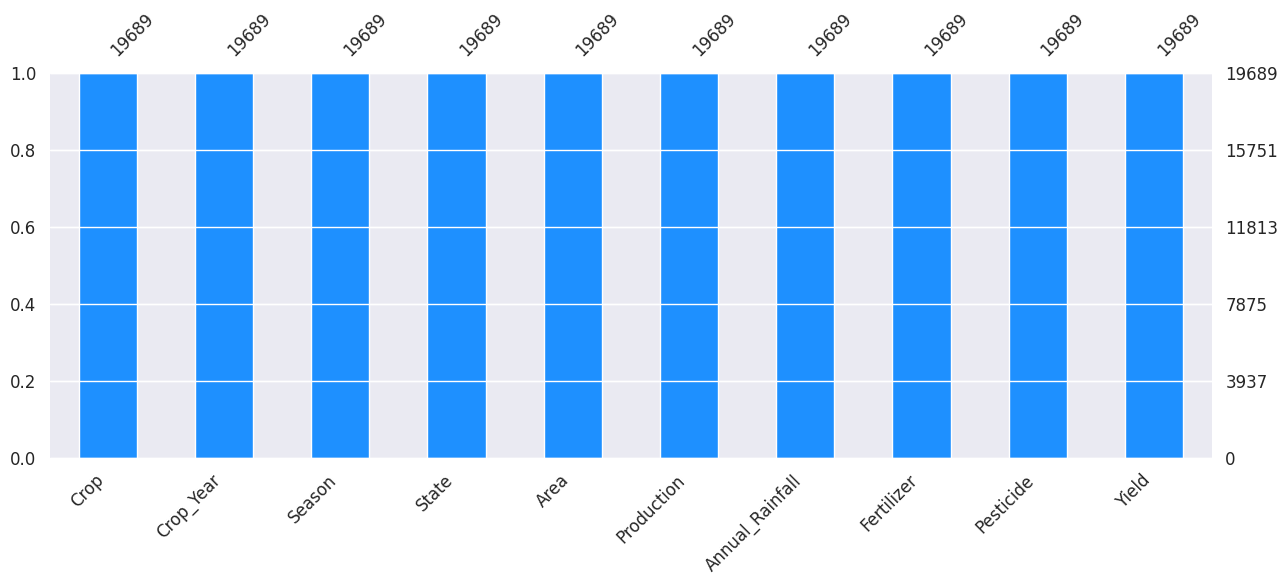

In [ ]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

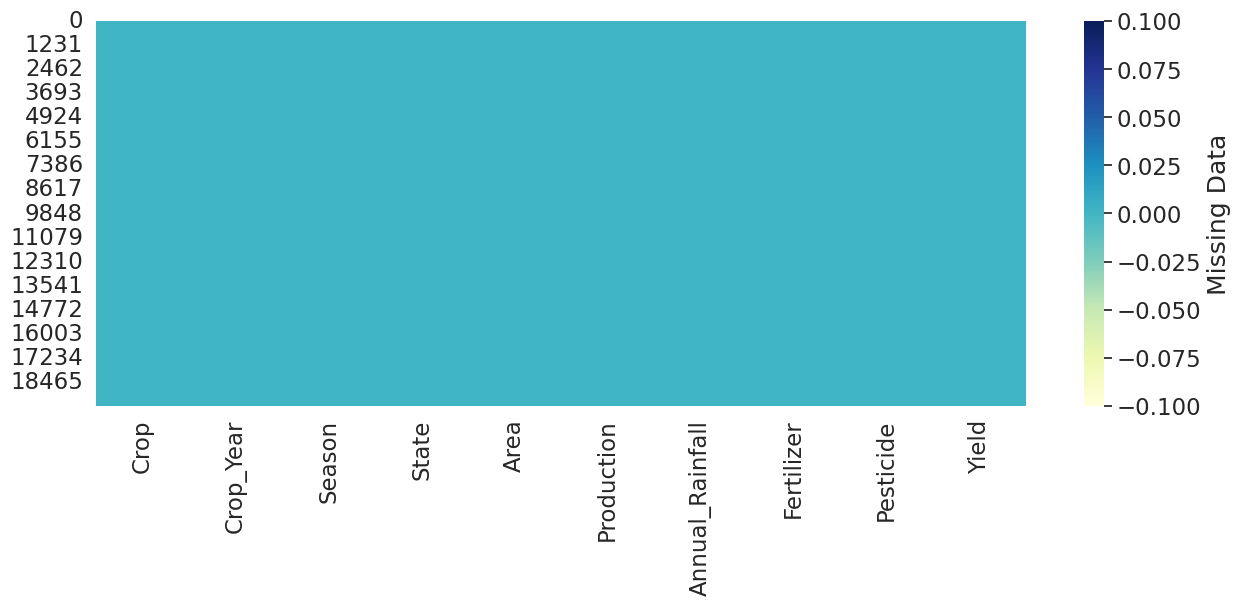

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'});

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [ ]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor Seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(Lint),Kharif,Assam


In [ ]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


In [ ]:
fig = px.imshow(numeric_data.corr(),text_auto=True,aspect="auto")
fig.show()

In [ ]:
df['Crop_Year'].value_counts(ascending=False)

,count
Crop_Year,
2019,1079
2017,1070
2018,1063
2016,1036
2015,998
2013,976
2014,965
2011,907
2012,894


In [ ]:
df = df[df['Crop_Year'] != 2020]

In [ ]:
df['Crop'].value_counts(ascending=False)

,count
Crop,
Rice,1195
Maize,973
Moong(Green Gram),738
Urad,731
Groundnut,724
Sesamum,684
Potato,626
Sugarcane,604
Wheat,544


In [ ]:
df['Season'].value_counts(ascending=False)

,count
Season,
Kharif,8215
Rabi,5732
Whole Year,3712
Summer,1190
Autumn,414
Winter,389


In [ ]:
df['State'].value_counts(ascending=False)

,count
State,
Karnataka,1432
Andhra Pradesh,1266
West Bengal,1094
Chhattisgarh,915
Bihar,896
Madhya Pradesh,845
Uttar Pradesh,825
Tamil Nadu,822
Gujarat,817


In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


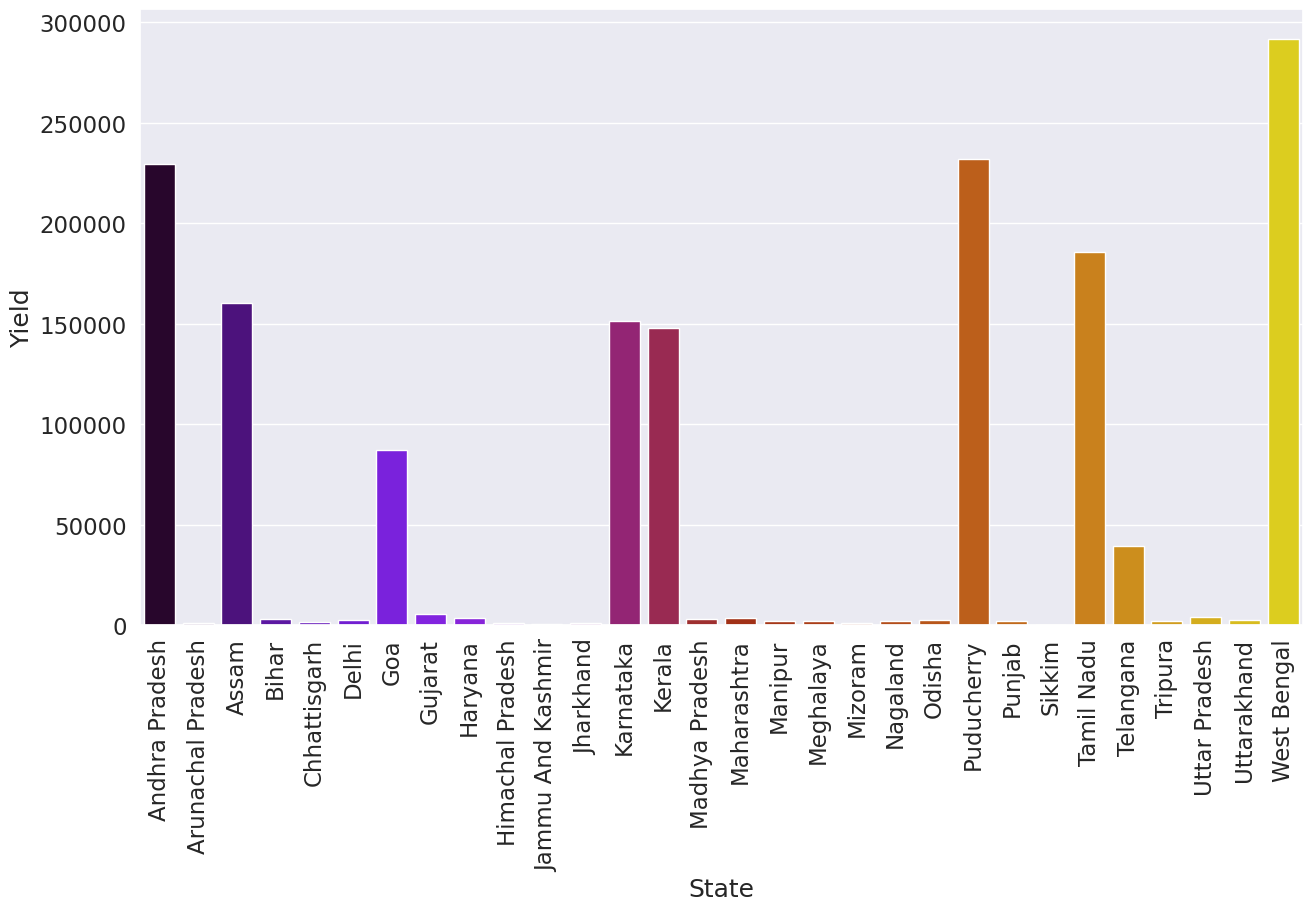

In [ ]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

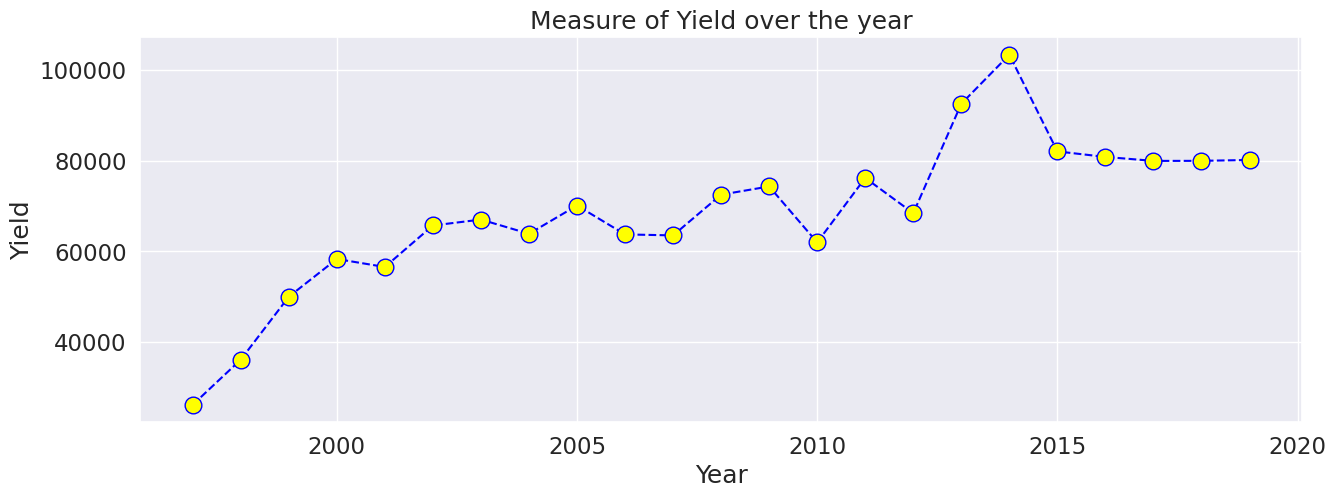

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


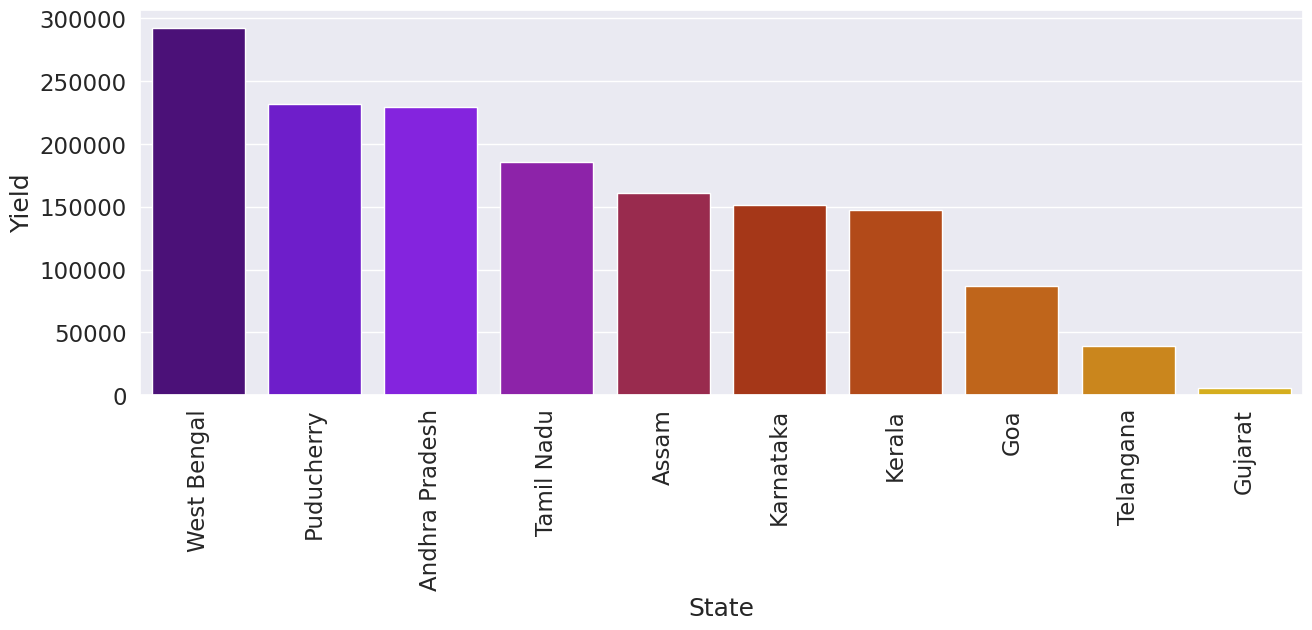

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


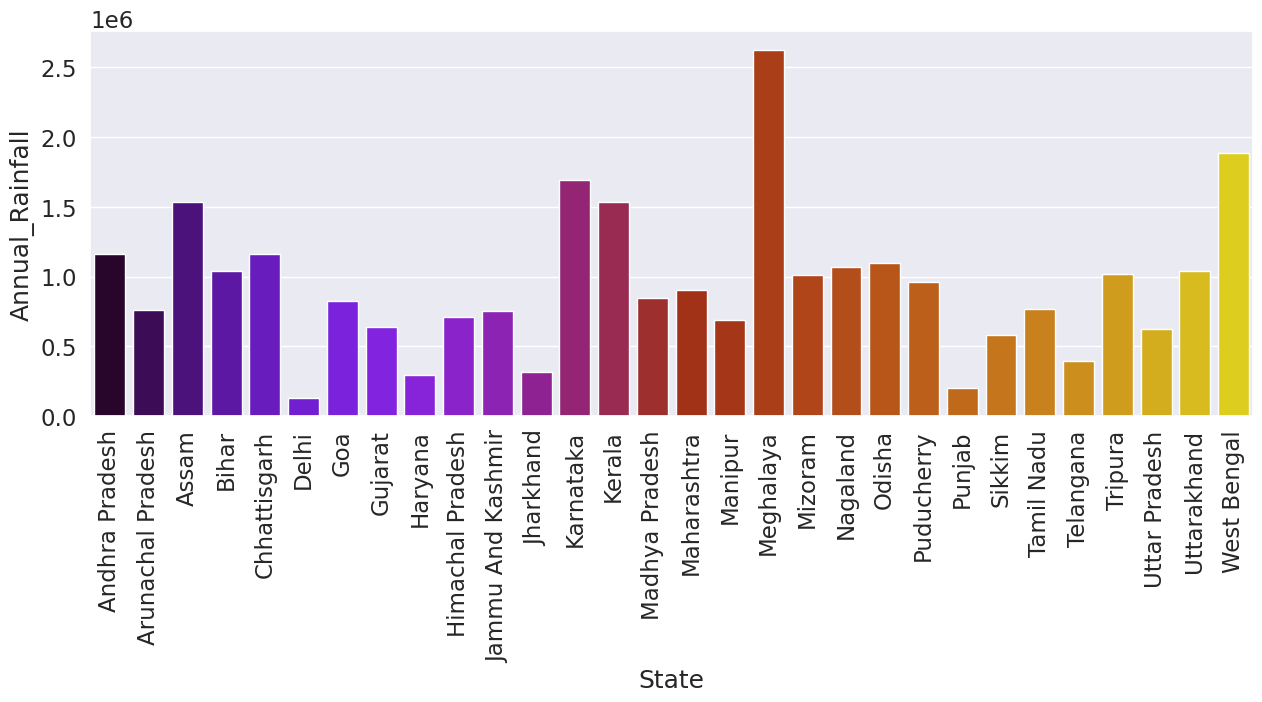

In [ ]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

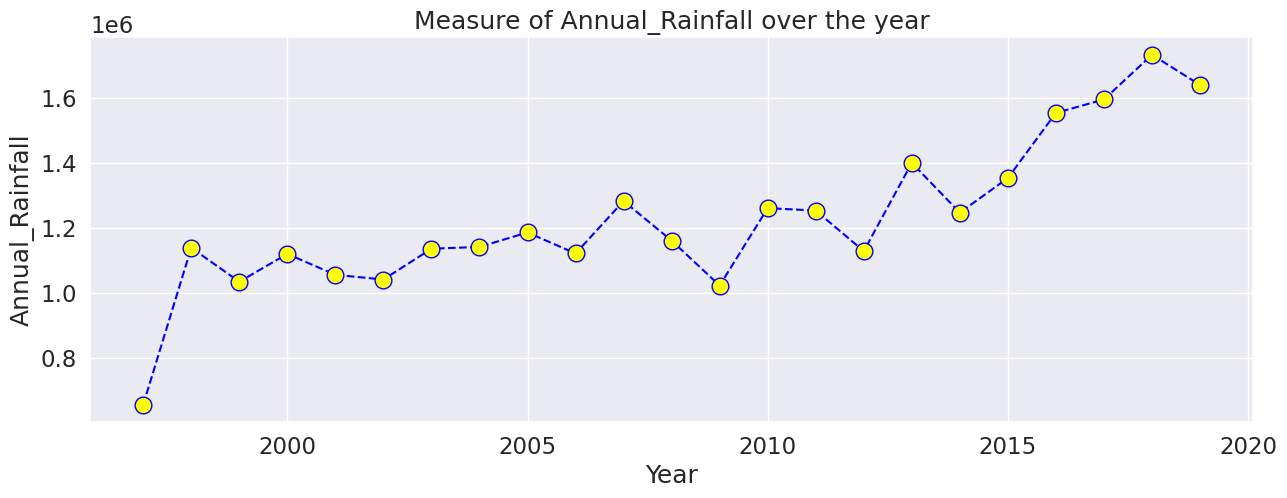

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


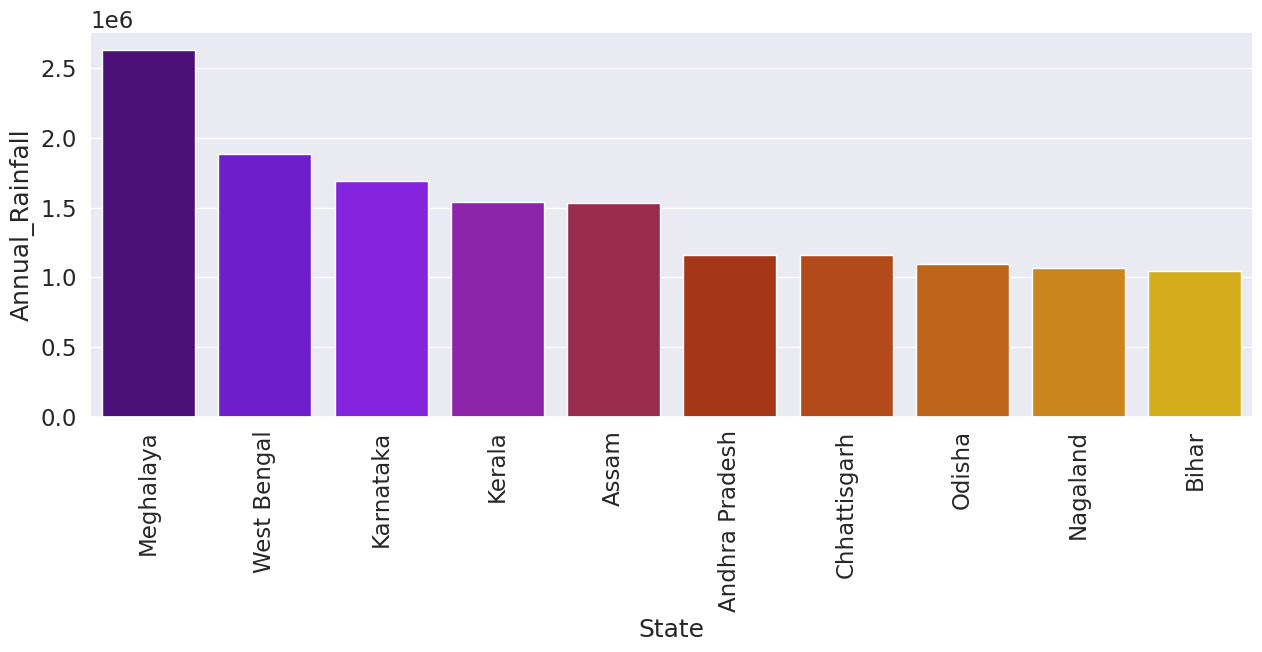

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


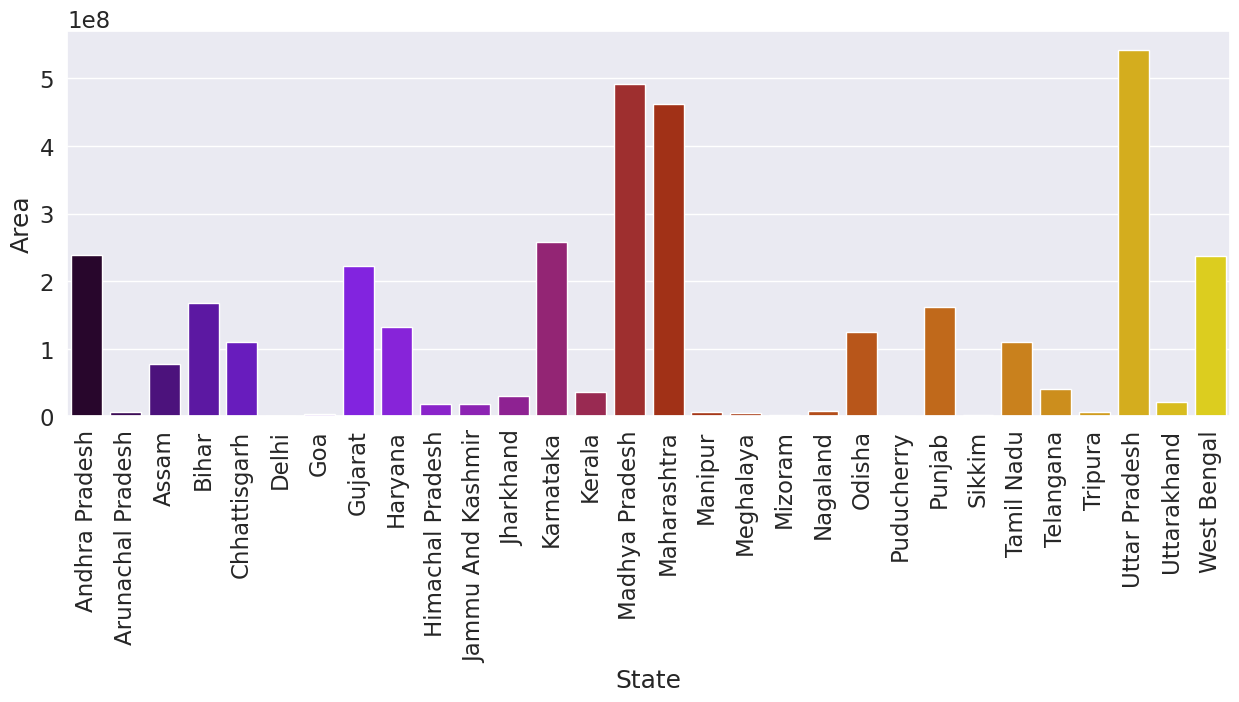

In [ ]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

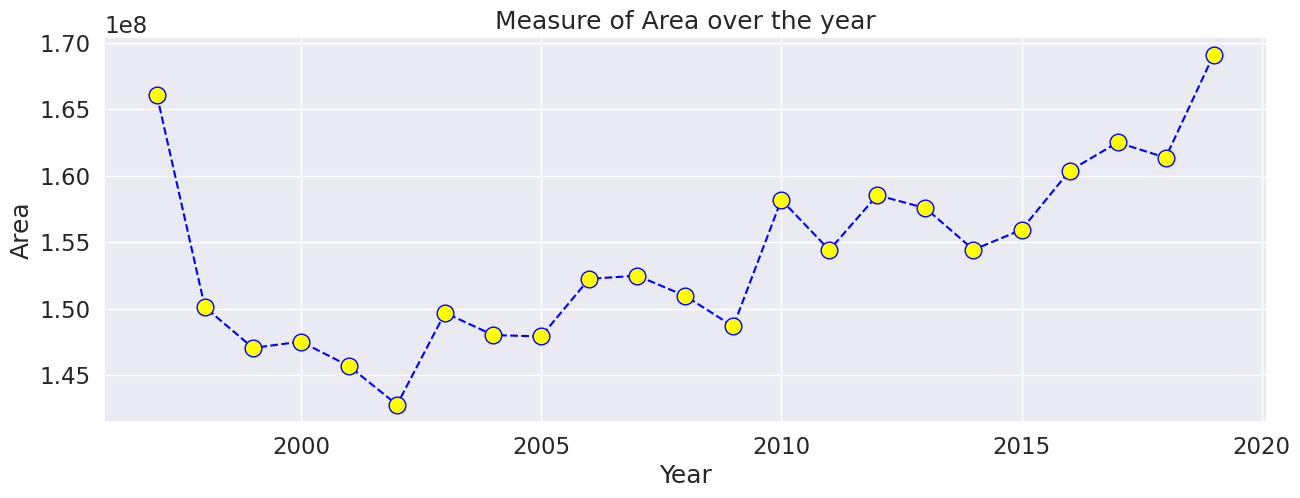

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


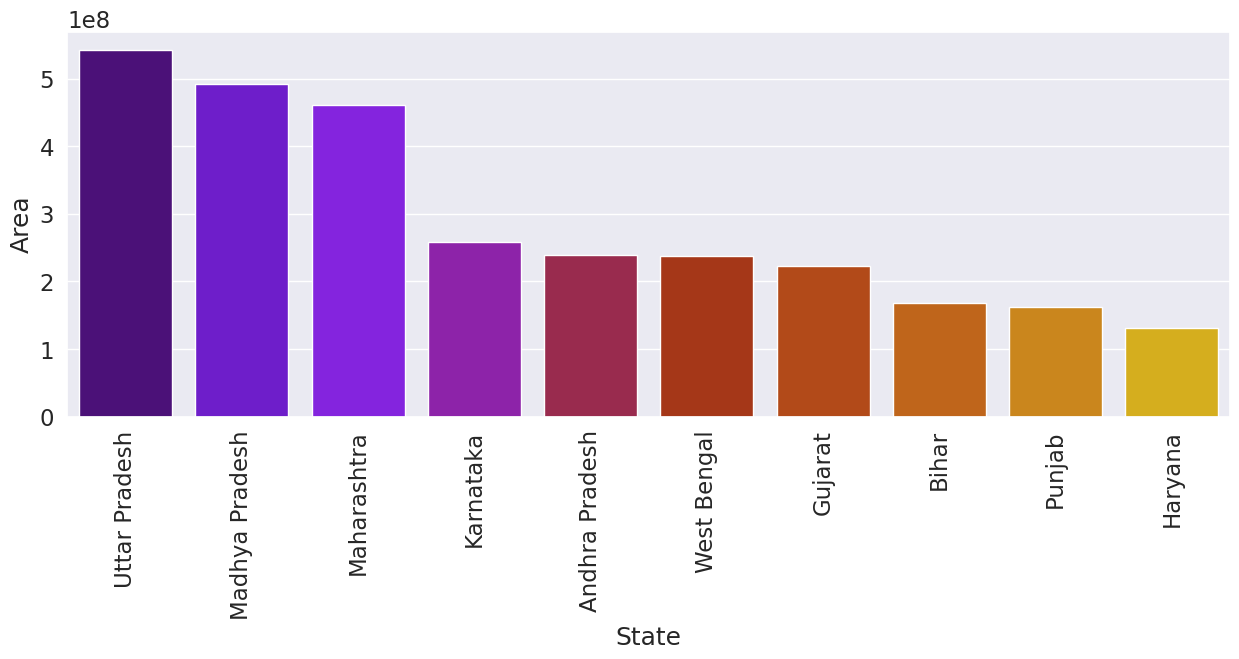

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


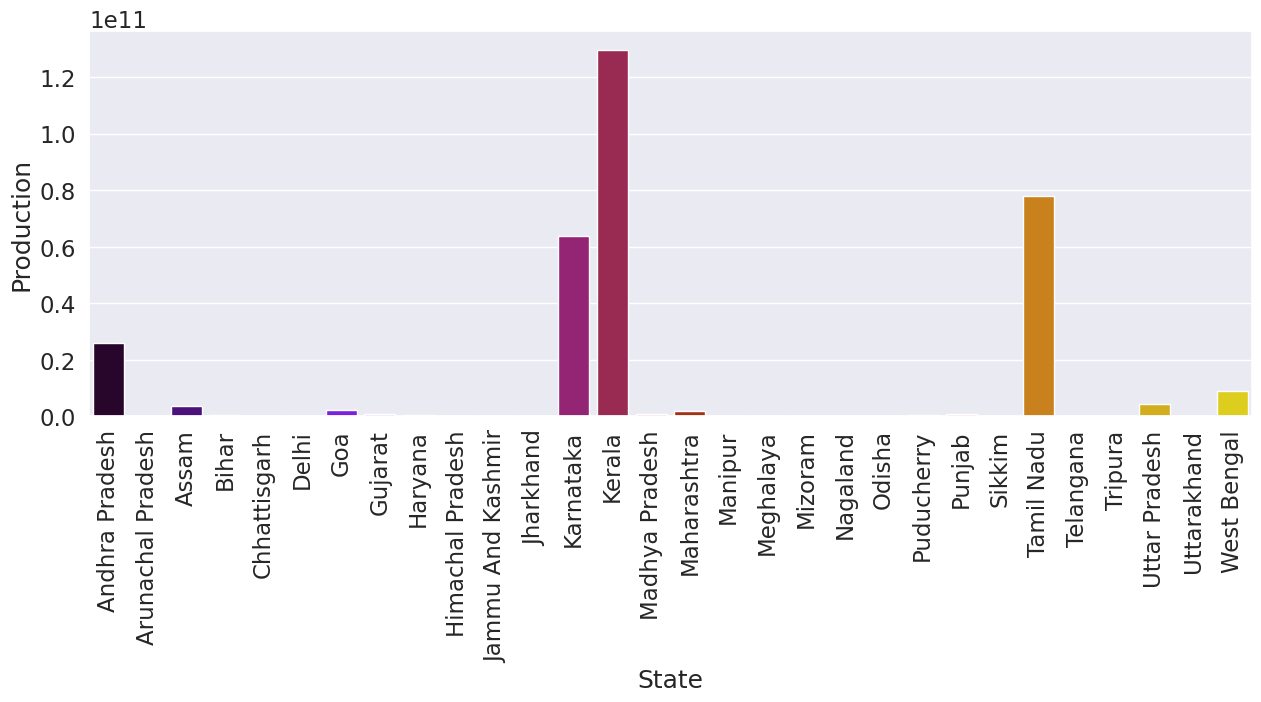

In [ ]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

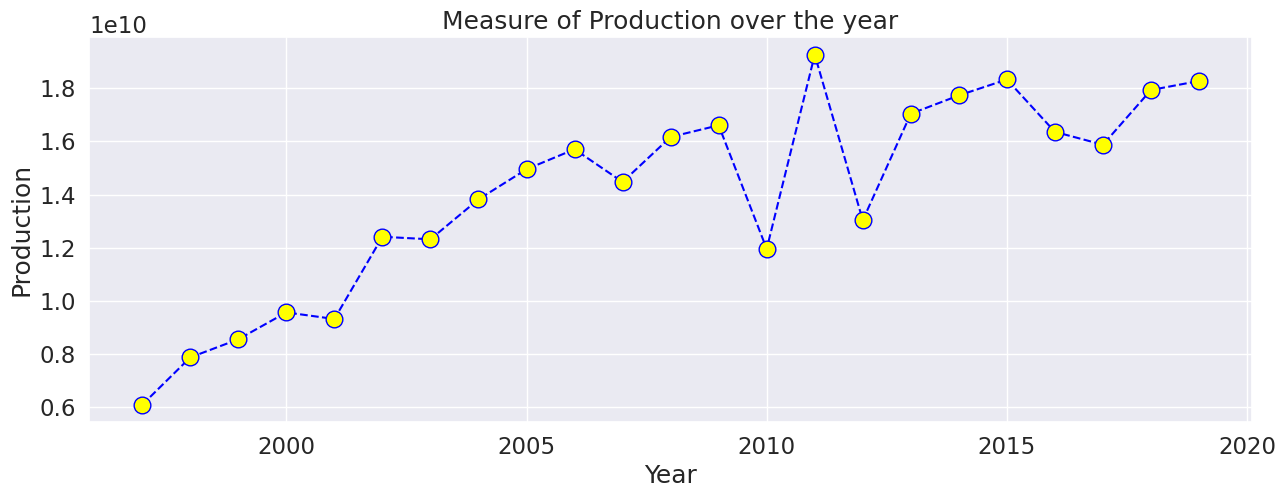

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


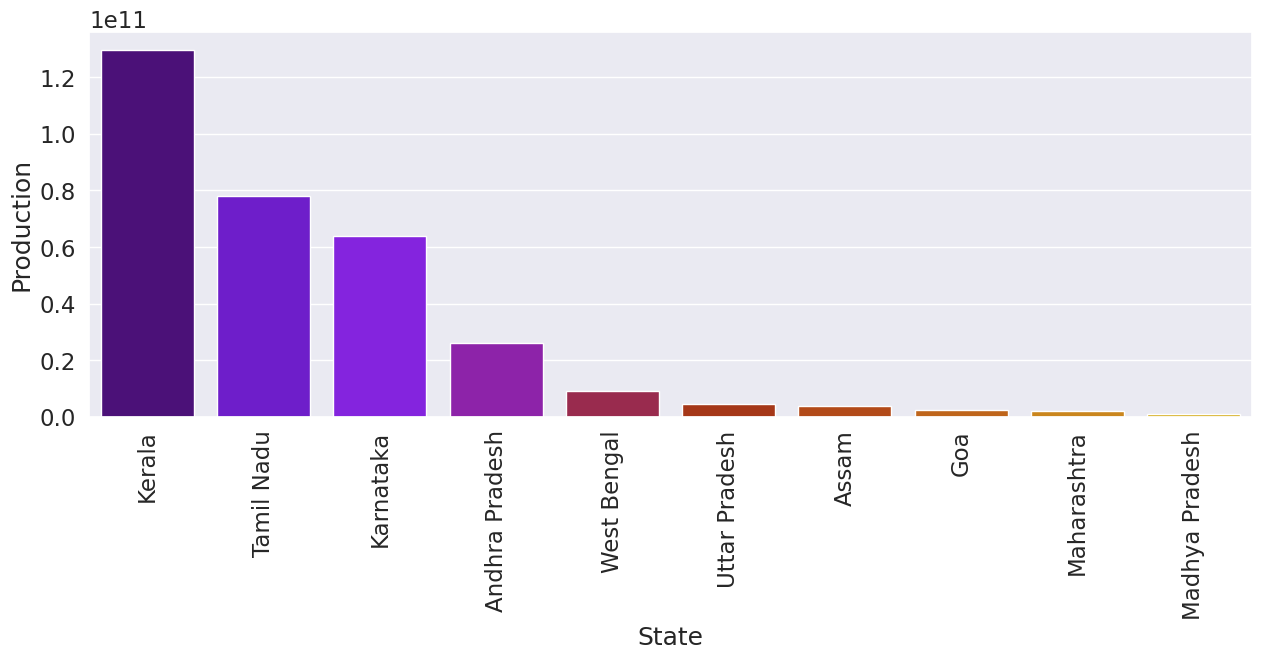

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


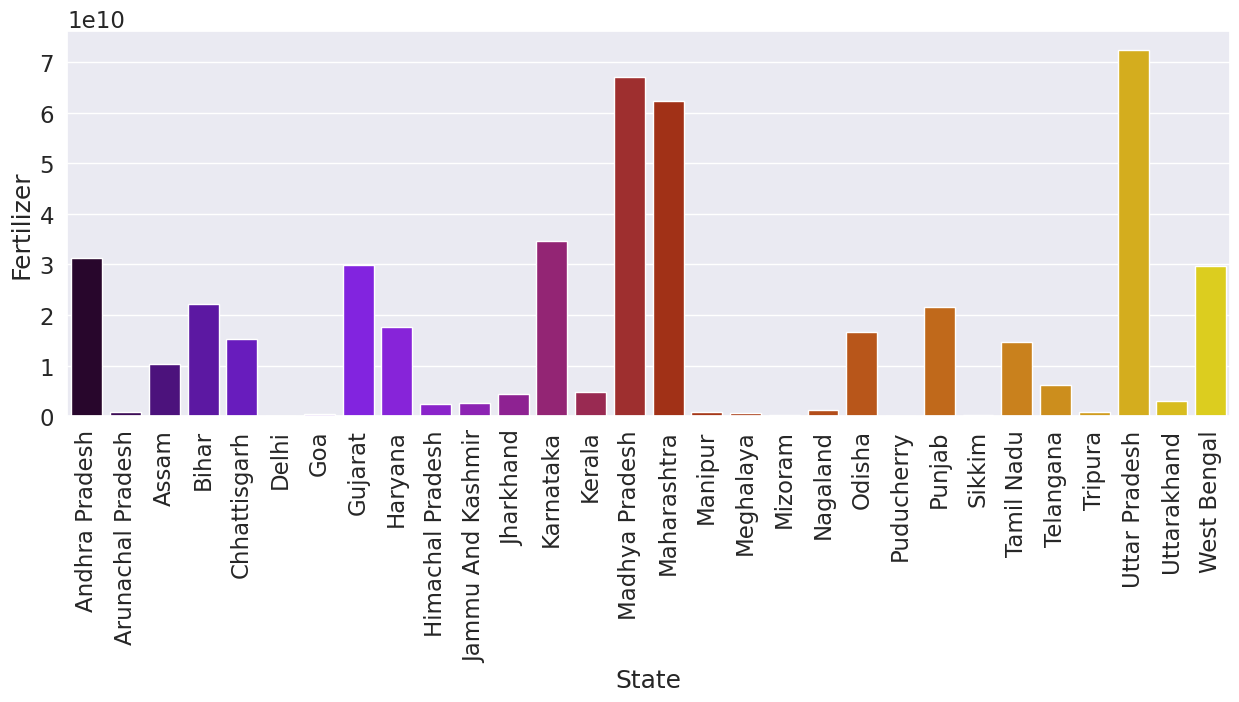

In [ ]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

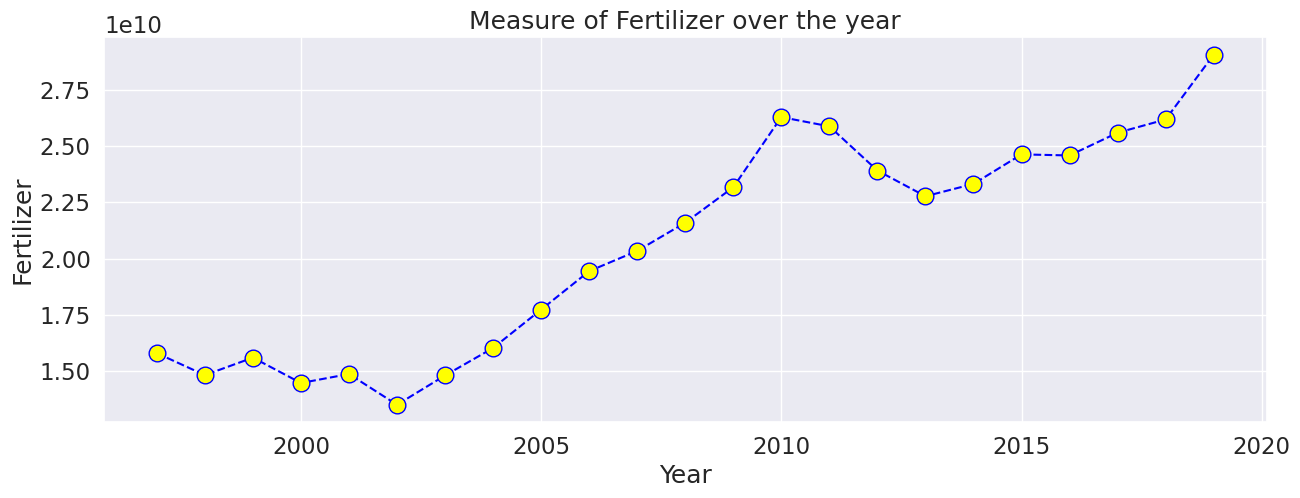

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


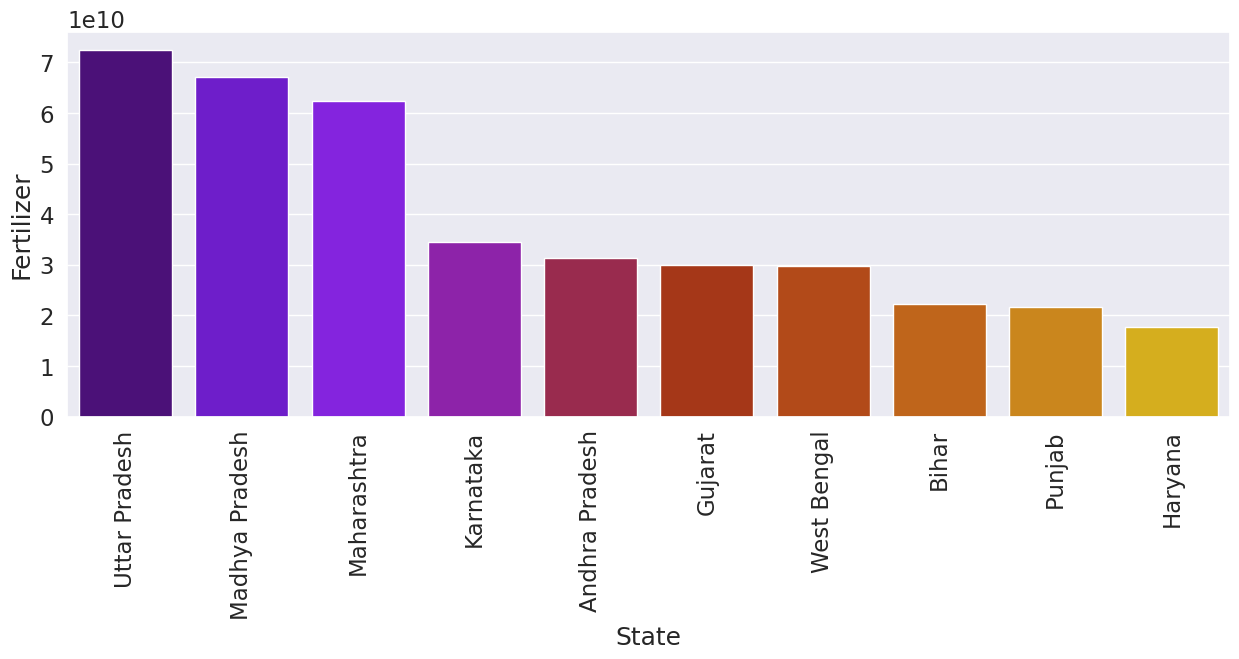

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


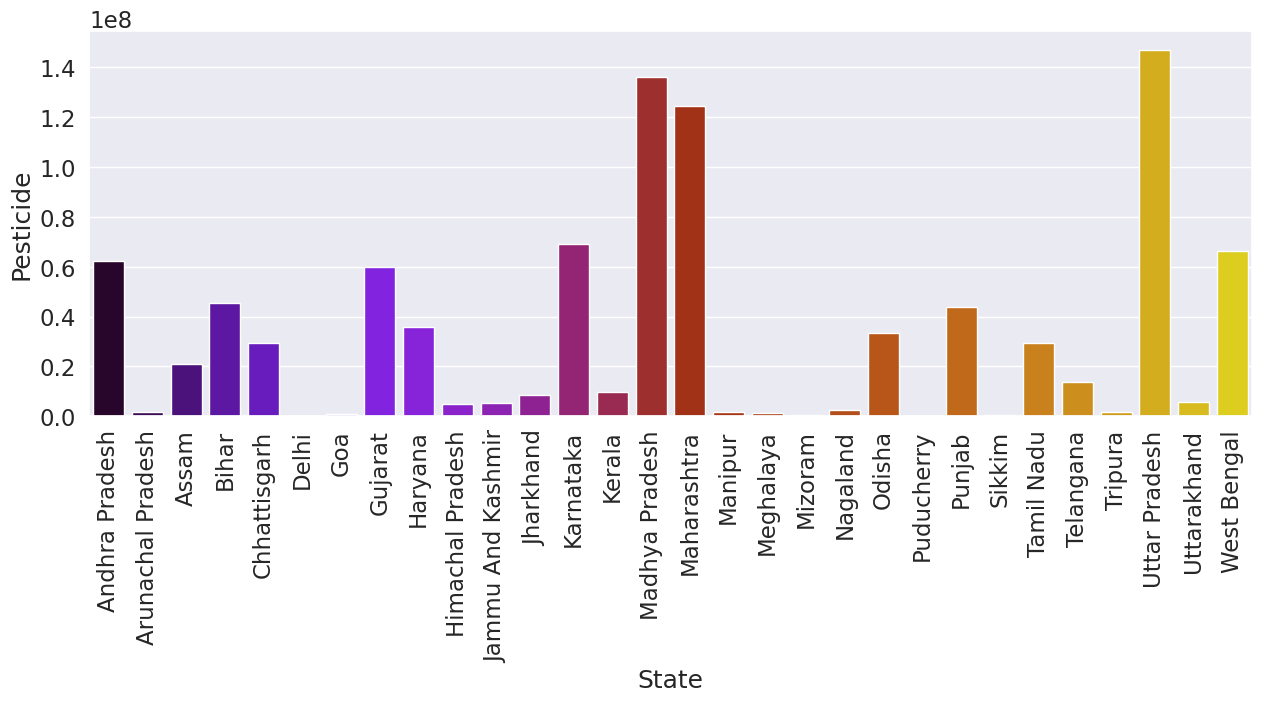

In [ ]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

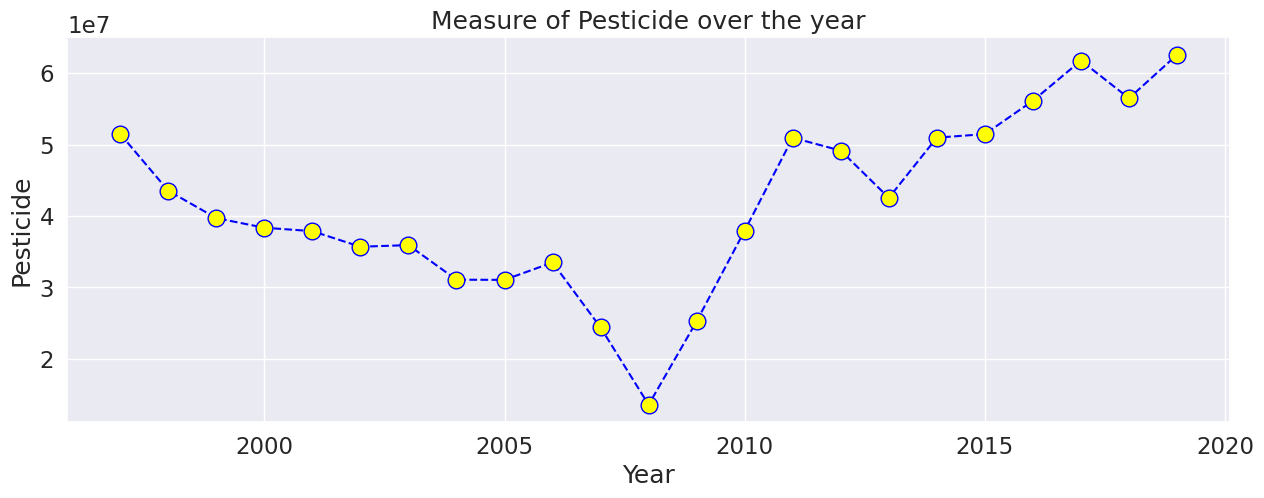

In [ ]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

In [ ]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


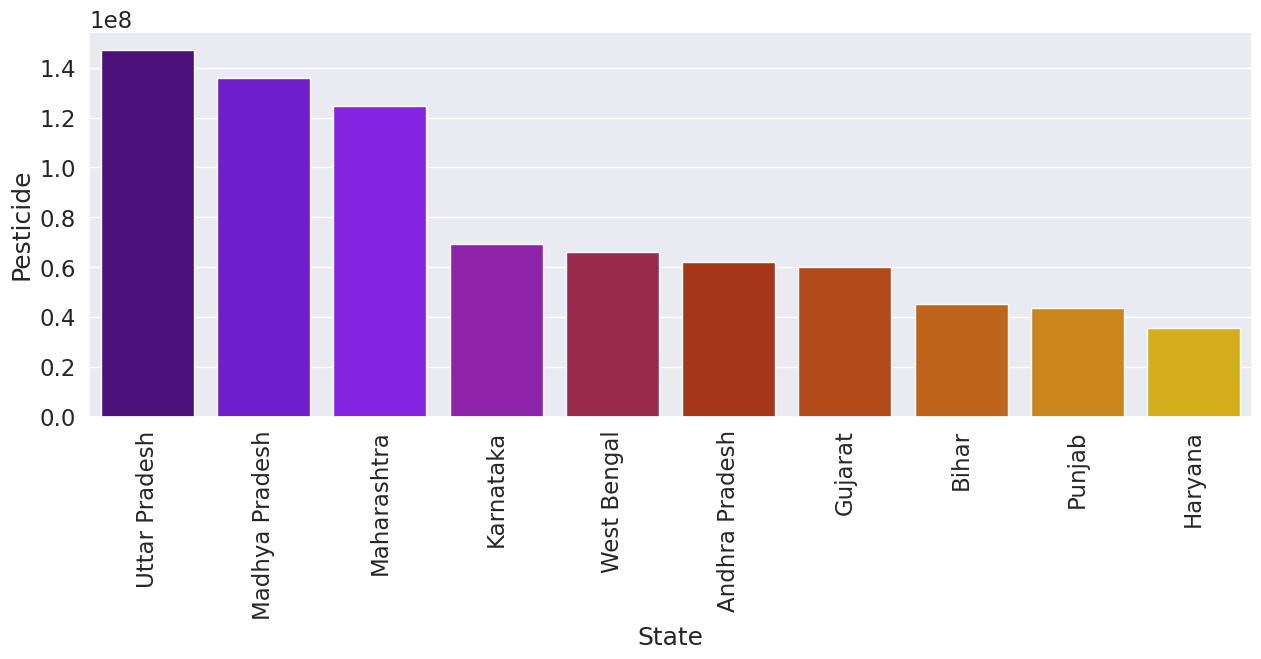

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df_without_eda = df.copy()

In [ ]:
df_without_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


### One-Hot Encoding

In [ ]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [ ]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [ ]:
df_without_eda.shape

(19652, 95)

In [ ]:
df_without_eda.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1997,796.00,22,2051.40,75755.32,246.76,0.24,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [ ]:
df_without_eda.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,796.00,22,2051.40,75755.32,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df_without_eda.drop(['Yield'], axis = 1)
y = df_without_eda['Yield']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 94)
y_train - >   (15721,)
x_test  - >   (3931, 94)
y_test  - >   (3931,)


In [ ]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [ ]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.

    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))

    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

In [ ]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.92%, Adjusted R² = 84.83%, RMSE = 345.8348
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9635



In [ ]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.82%, RMSE = 345.9536
Testing Data : R² = 81.45%, Adjusted R² = 81.00%, RMSE = 357.9658



In [ ]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.81%, RMSE = 346.0390
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9522



In [ ]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 43.07%, Adjusted R² = 42.72%, RMSE = 672.0466
Testing Data : R² = 49.18%, Adjusted R² = 47.94%, RMSE = 592.5247



In [ ]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 97.40%, Adjusted R² = 97.33%, RMSE = 134.1175



In [ ]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.61%, Adjusted R² = 99.60%, RMSE = 55.8598
Testing Data : R² = 98.71%, Adjusted R² = 98.67%, RMSE = 94.5562



In [ ]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 91.07%, Adjusted R² = 91.02%, RMSE = 266.1082
Testing Data : R² = 90.54%, Adjusted R² = 90.31%, RMSE = 255.5904



In [ ]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.72%, Adjusted R² = 99.71%, RMSE = 47.4115
Testing Data : R² = 98.37%, Adjusted R² = 98.33%, RMSE = 105.9996



In [ ]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 93
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.76%, Adjusted R² = 97.75%, RMSE = 133.2447
Testing Data : R² = 95.88%, Adjusted R² = 95.78%, RMSE = 168.7017



In [ ]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 1.5815
Testing Data : R² = 98.41%, Adjusted R² = 98.37%, RMSE = 104.8998



In [ ]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.98%, Adjusted R² = 99.98%, RMSE = 12.0639
Testing Data : R² = 98.08%, Adjusted R² = 98.04%, RMSE = 115.0786



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 94.44%, Adjusted R² = 94.41%, RMSE = 210.0357
Testing Data : R² = 93.43%, Adjusted R² = 93.26%, RMSE = 213.1140



In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [ ]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [ ]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 95.98%, Adjusted R² = 95.96%, RMSE = 178.5215
Testing Data : R² = 94.48%, Adjusted R² = 94.34%, RMSE = 195.3145



In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [ ]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.43%, Adjusted R² = 99.43%, RMSE = 67.2797
Testing Data : R² = 98.35%, Adjusted R² = 98.31%, RMSE = 106.7433



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [ ]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

In [ ]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [ ]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.25%, Adjusted R² = 99.24%, RMSE = 77.3096
Testing Data : R² = 98.77%, Adjusted R² = 98.74%, RMSE = 92.0624



In [ ]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [ ]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })

df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
14,Stacking Regressor,99.25,99.24,77.31,98.77,98.74,92.06
5,Random Forest,99.61,99.60,55.86,98.71,98.67,94.56
9,XGBoost,100.00,100.00,1.58,98.41,98.37,104.90
7,Gradient Boost,99.72,99.71,47.41,98.37,98.33,106.00
13,Bagging Regressor,99.43,99.43,67.28,98.35,98.31,106.74
10,CatBoost,99.98,99.98,12.06,98.08,98.04,115.08
4,Decision Tree,100.00,100.00,0.00,97.40,97.33,134.12
8,LGBM,97.76,97.75,133.24,95.88,95.78,168.70
12,Voting Regressor,95.98,95.96,178.52,94.48,94.34,195.31
11,KNN,94.44,94.41,210.04,93.43,93.26,213.11


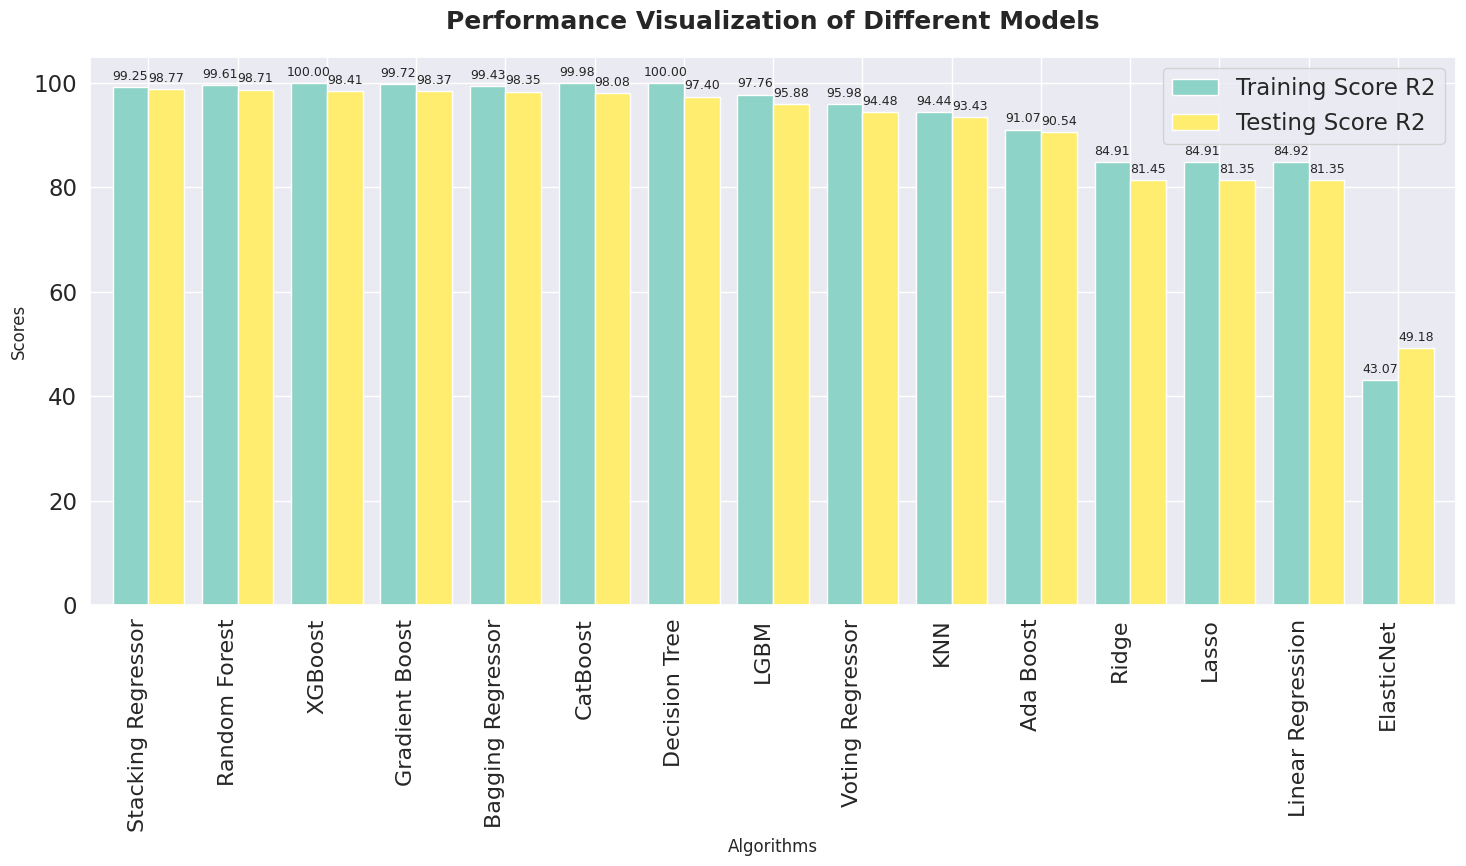

In [ ]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

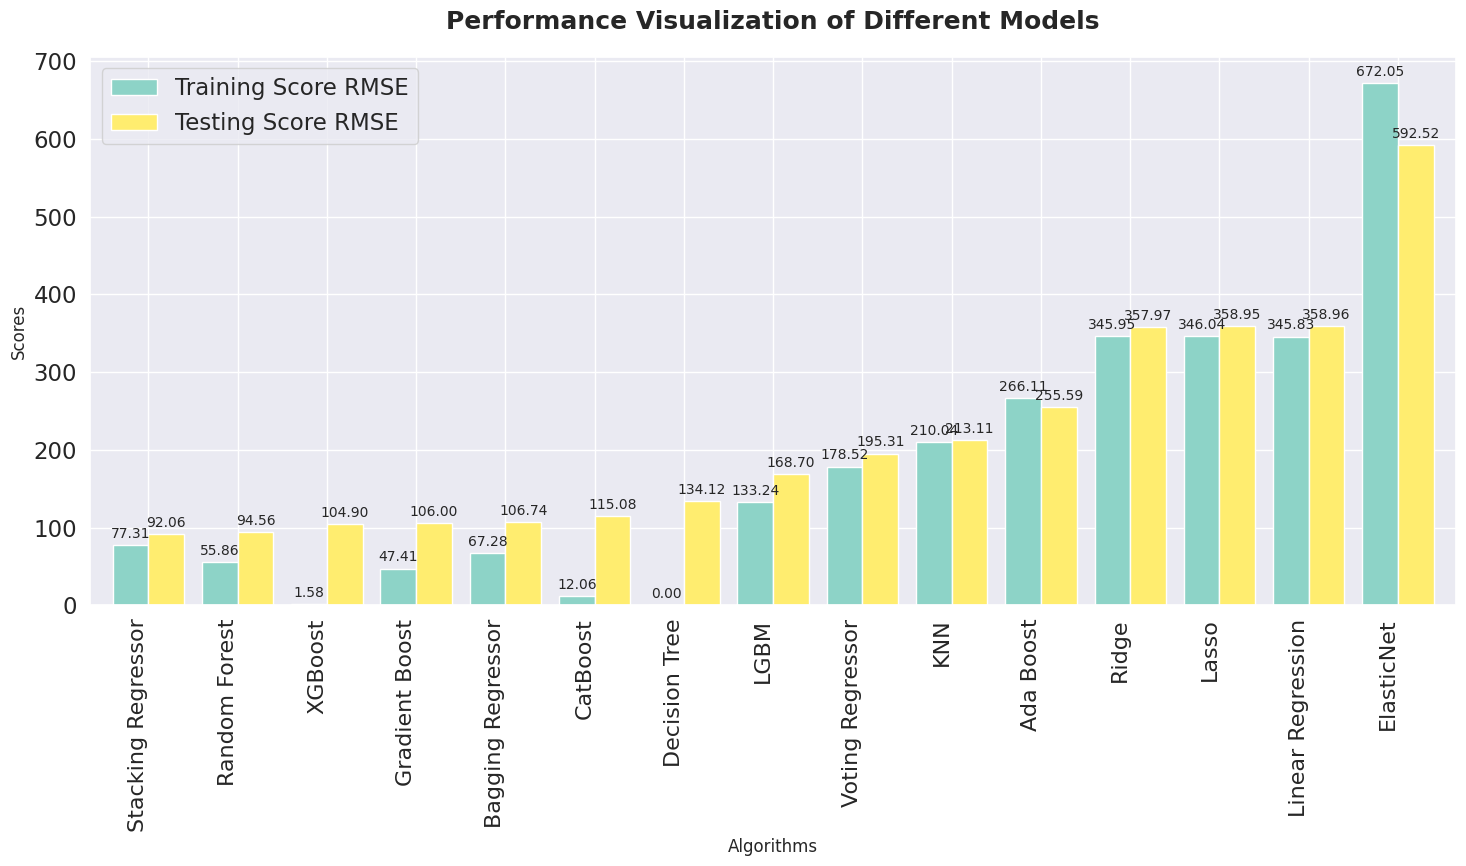

In [ ]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

In [ ]:
df_with_eda = df.copy()

In [ ]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [ ]:
# Check skewness for each column
skewness = df_with_eda[['Area','Production','Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

,0
Annual_Rainfall,2.13
Fertilizer,13.40
Production,19.28
Area,21.84
Pesticide,25.61


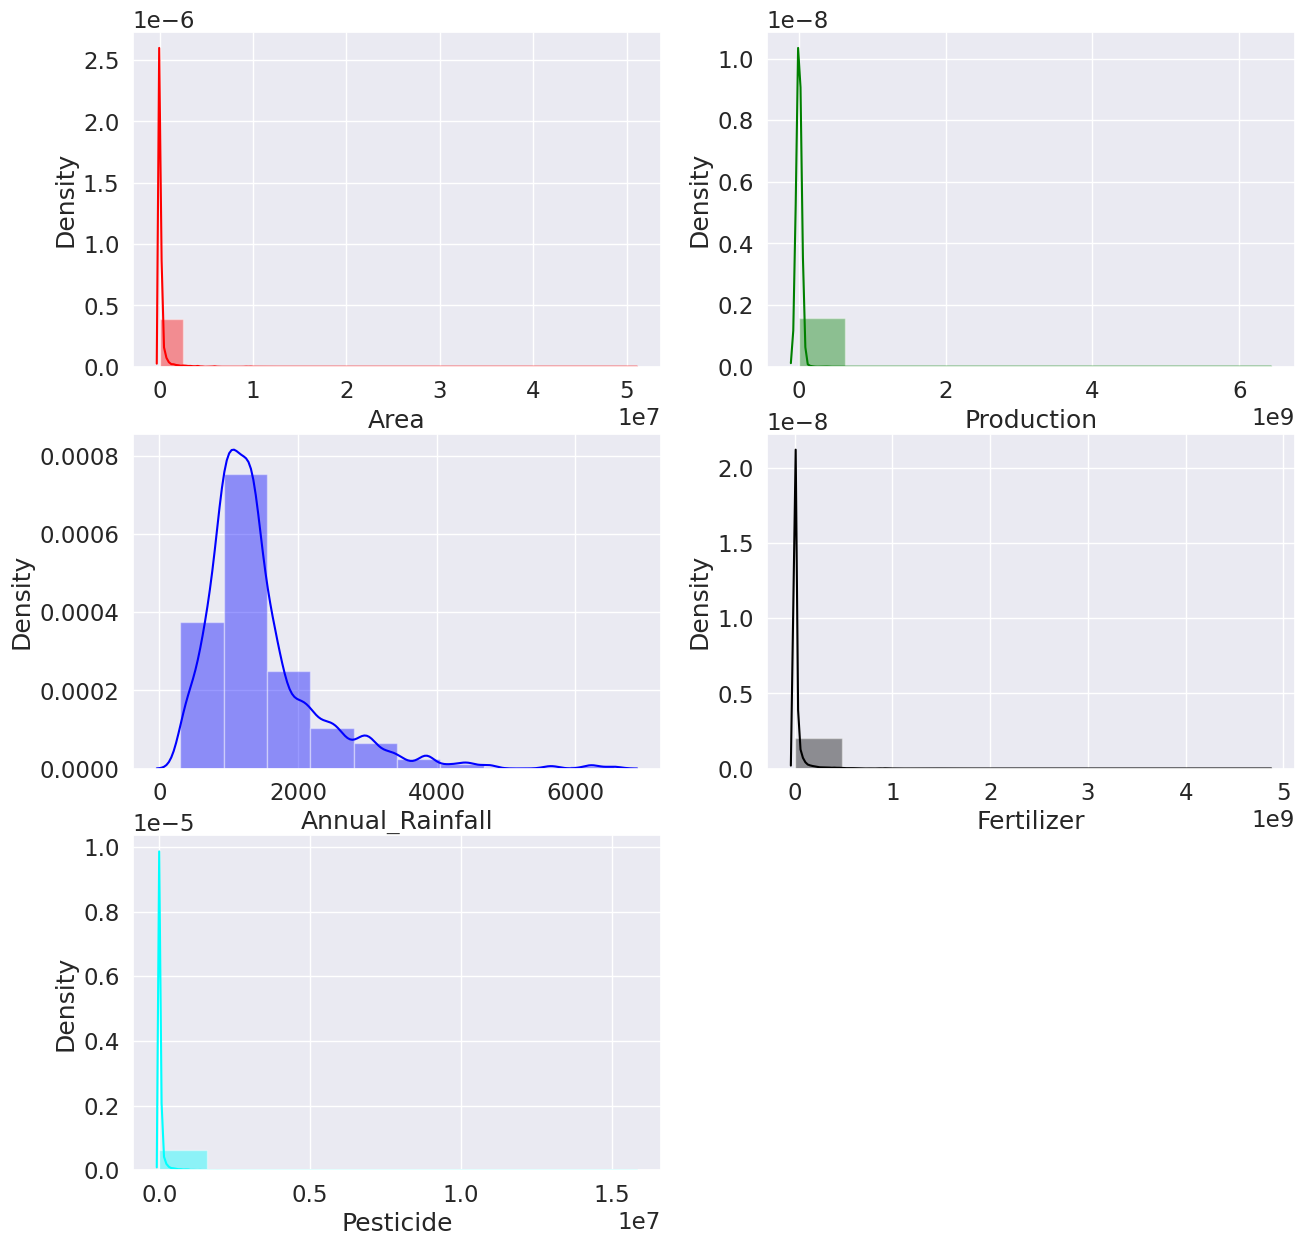

In [ ]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,5)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

In [ ]:
df_with_eda.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,Arhar/Tur,1997,Kharif,Assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,Castor Seed,1997,Kharif,Assam,796.00,22,2051.40,75755.32,246.76,0.24
3,Coconut,1997,Whole Year,Assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,Cotton(Lint),1997,Kharif,Assam,1739.00,794,2051.40,165500.63,539.09,0.42


In [ ]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield']

In [ ]:
vif_columns = [col for col in df_with_eda.columns if col not in exclude_column]

In [ ]:
vif1 = df_with_eda[vif_columns].copy()

In [ ]:
variable = vif1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [ ]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
0,34.47,Area
3,20.54,Fertilizer
4,20.50,Pesticide
2,1.03,Annual_Rainfall
1,1.01,Production


In [ ]:
vif2 = vif1.copy()

In [ ]:
vif2.drop(['Area'], axis = 1, inplace=True)

In [ ]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area']

In [ ]:
vif_columns = [col for col in vif2.columns if col not in exclude_column]

In [ ]:
variable = vif2
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [ ]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
2,12.01,Fertilizer
3,11.95,Pesticide
1,1.03,Annual_Rainfall
0,1.01,Production


In [ ]:
vif3 = vif2.copy()

In [ ]:
vif3.drop(['Fertilizer'], axis = 1, inplace=True)

In [ ]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area','Fertilizer']

In [ ]:
vif_columns = [col for col in vif3.columns if col not in exclude_column]

In [ ]:
variable = vif3
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [ ]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,1.03,Annual_Rainfall
2,1.02,Pesticide
0,1.01,Production


In [ ]:
df_with_eda_encoding = df_with_eda.copy()
df_with_eda_encoding = df_with_eda_encoding.drop(['Crop_Year'], axis = 1)

In [ ]:
category_columns = df_with_eda_encoding.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [ ]:
df_with_eda_encoding = pd.get_dummies(df_with_eda_encoding, columns = category_columns, drop_first=True)

In [ ]:
boolean_cols_auto = df_with_eda_encoding.select_dtypes(include=['bool']).columns
df_with_eda_encoding[boolean_cols_auto] = df_with_eda_encoding[boolean_cols_auto].astype(int)

In [ ]:
df_with_eda_encoding.head()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black Pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor Seed,Crop_Coconut,Crop_Coriander,Crop_Cotton(Lint),Crop_Cowpea(Lobia),Crop_Dry Chillies,Crop_Garlic,Crop_Ginger,Crop_Gram,Crop_Groundnut,Crop_Guar Seed,Crop_Horse-Gram,Crop_Jowar,Crop_Jute,Crop_Khesari,Crop_Linseed,Crop_Maize,Crop_Masoor,Crop_Mesta,Crop_Moong(Green Gram),Crop_Moth,Crop_Niger Seed,Crop_Oilseeds Total,Crop_Onion,Crop_Other Rabi Pulses,Crop_Other Cereals,Crop_Other Kharif Pulses,Crop_Other Oilseeds,Crop_Other Summer Pulses,Crop_Peas & Beans (Pulses),Crop_Potato,Crop_Ragi,Crop_Rapeseed &Mustard,Crop_Rice,Crop_Safflower,Crop_Sannhamp,Crop_Sesamum,Crop_Small Millets,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet Potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chhattisgarh,State_Delhi,State_Goa,State_Gujarat,State_Haryana,State_Himachal Pradesh,State_Jammu And Kashmir,State_Jharkhand,State_Karnataka,State_Kerala,State_Madhya Pradesh,State_Maharashtra,State_Manipur,State_Meghalaya,State_Mizoram,State_Nagaland,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,73814.00,56708,2051.40,7024878.38,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6637.00,4685,2051.40,631643.29,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,796.00,22,2051.40,75755.32,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1739.00,794,2051.40,165500.63,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df_with_eda_encoding.drop(['Yield'], axis = 1)
y = df_with_eda_encoding['Yield']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 93)
y_train - >   (15721,)
x_test  - >   (3931, 93)
y_test  - >   (3931,)


In [ ]:
pt = PowerTransformer(method='yeo-johnson')

In [ ]:
x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

In [ ]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [ ]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.

    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)

    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100

    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))

    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2)
    testing_scores_rmse.append(test_rmse)

    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

In [ ]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7106
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0096



In [ ]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=None,              # Maximum number of iterations for the solver
    tol=0.001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [ ]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7107
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0080



In [ ]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [ ]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 85.32%, Adjusted R² = 85.23%, RMSE = 341.3086
Testing Data : R² = 82.75%, Adjusted R² = 82.33%, RMSE = 345.2451



In [ ]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha=1.0,                  # Regularization strength
    l1_ratio=0.5,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [ ]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 76.29%, Adjusted R² = 76.15%, RMSE = 433.7033
Testing Data : R² = 73.77%, Adjusted R² = 73.13%, RMSE = 425.7063



In [ ]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=None,          # Grow a tree with a maximum number of leaf nodes
    min_impurity_decrease=0.0,    # Minimum impurity decrease required to make a further split
    ccp_alpha=0.0                # Complexity parameter used for Minimal Cost-Complexity Pruning
)

In [ ]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 96.82%, Adjusted R² = 96.75%, RMSE = 148.1681



In [ ]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=100,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [ ]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.58%, Adjusted R² = 99.58%, RMSE = 57.8276
Testing Data : R² = 97.84%, Adjusted R² = 97.79%, RMSE = 122.0976



In [ ]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 93.42%, Adjusted R² = 93.38%, RMSE = 228.4255
Testing Data : R² = 91.14%, Adjusted R² = 90.92%, RMSE = 247.4294



In [ ]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.69%, Adjusted R² = 99.69%, RMSE = 49.7006
Testing Data : R² = 98.44%, Adjusted R² = 98.40%, RMSE = 103.7737



In [ ]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 92
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.30%, Adjusted R² = 97.28%, RMSE = 146.4593
Testing Data : R² = 95.83%, Adjusted R² = 95.73%, RMSE = 169.7243



In [ ]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 2.4311
Testing Data : R² = 98.40%, Adjusted R² = 98.36%, RMSE = 105.0577



In [ ]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.97%, Adjusted R² = 99.97%, RMSE = 14.1976
Testing Data : R² = 97.65%, Adjusted R² = 97.59%, RMSE = 127.4793



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,               # Number of neighbors to use
    weights='uniform',           # Weight function: 'uniform' or 'distance'
    algorithm='auto',            # Algorithm used to compute the nearest neighbors
    leaf_size=30,                # Leaf size for tree-based algorithms
    metric='minkowski',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=2,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)


In [ ]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 98.32%, Adjusted R² = 98.31%, RMSE = 115.4408
Testing Data : R² = 98.20%, Adjusted R² = 98.16%, RMSE = 111.4005



In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [ ]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [ ]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)


VotingRegressor Performance Metrics:
Training Data: R² = 97.36%, Adjusted R² = 97.34%, RMSE = 144.7242
Testing Data : R² = 96.40%, Adjusted R² = 96.31%, RMSE = 157.6790



In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [ ]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,           # Number of base estimators
    max_samples=0.8,           # Fraction of samples to use for each base estimator
    max_features=0.8,          # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

In [ ]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)


BaggingRegressor Performance Metrics:
Training Data: R² = 99.57%, Adjusted R² = 99.57%, RMSE = 58.3321
Testing Data : R² = 98.44%, Adjusted R² = 98.41%, RMSE = 103.6626



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [ ]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

In [ ]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)


In [ ]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.15%, Adjusted R² = 99.15%, RMSE = 82.0466
Testing Data : R² = 98.44%, Adjusted R² = 98.40%, RMSE = 103.7569



In [ ]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [ ]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })

df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
13,Bagging Regressor,99.57,99.57,58.33,98.44,98.41,103.66
14,Stacking Regressor,99.15,99.15,82.05,98.44,98.40,103.76
7,Gradient Boost,99.69,99.69,49.70,98.44,98.40,103.77
9,XGBoost,100.00,100.00,2.43,98.40,98.36,105.06
11,KNN,98.32,98.31,115.44,98.20,98.16,111.40
5,Random Forest,99.58,99.58,57.83,97.84,97.79,122.10
10,CatBoost,99.97,99.97,14.20,97.65,97.59,127.48
4,Decision Tree,100.00,100.00,0.00,96.82,96.75,148.17
12,Voting Regressor,97.36,97.34,144.72,96.40,96.31,157.68
8,LGBM,97.30,97.28,146.46,95.83,95.73,169.72


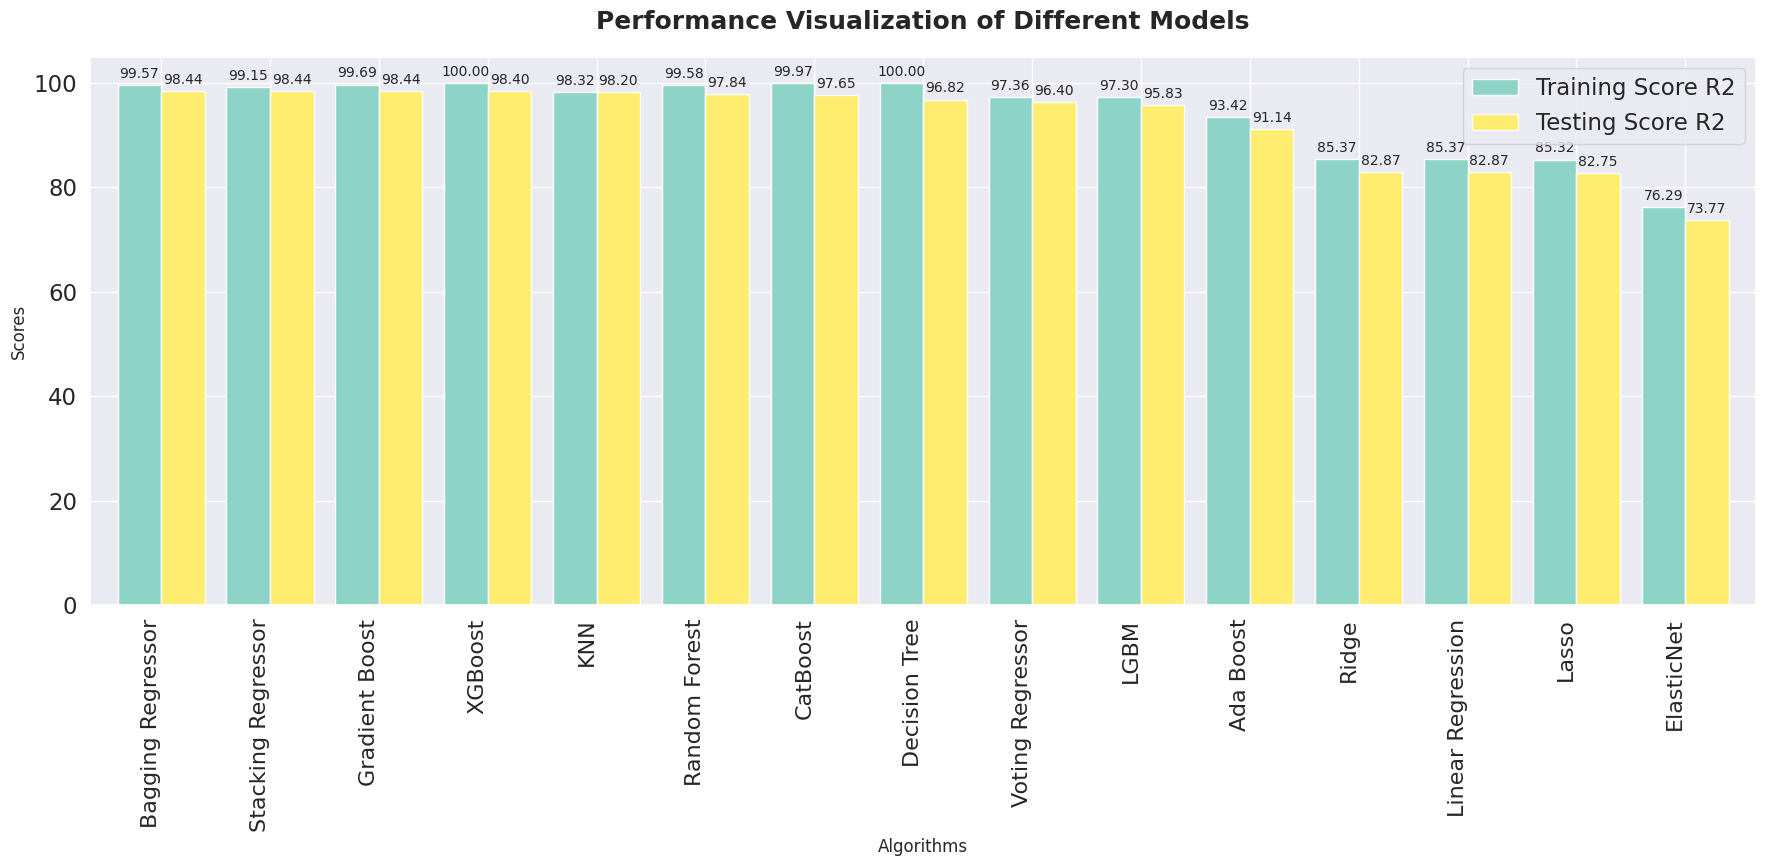

In [ ]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

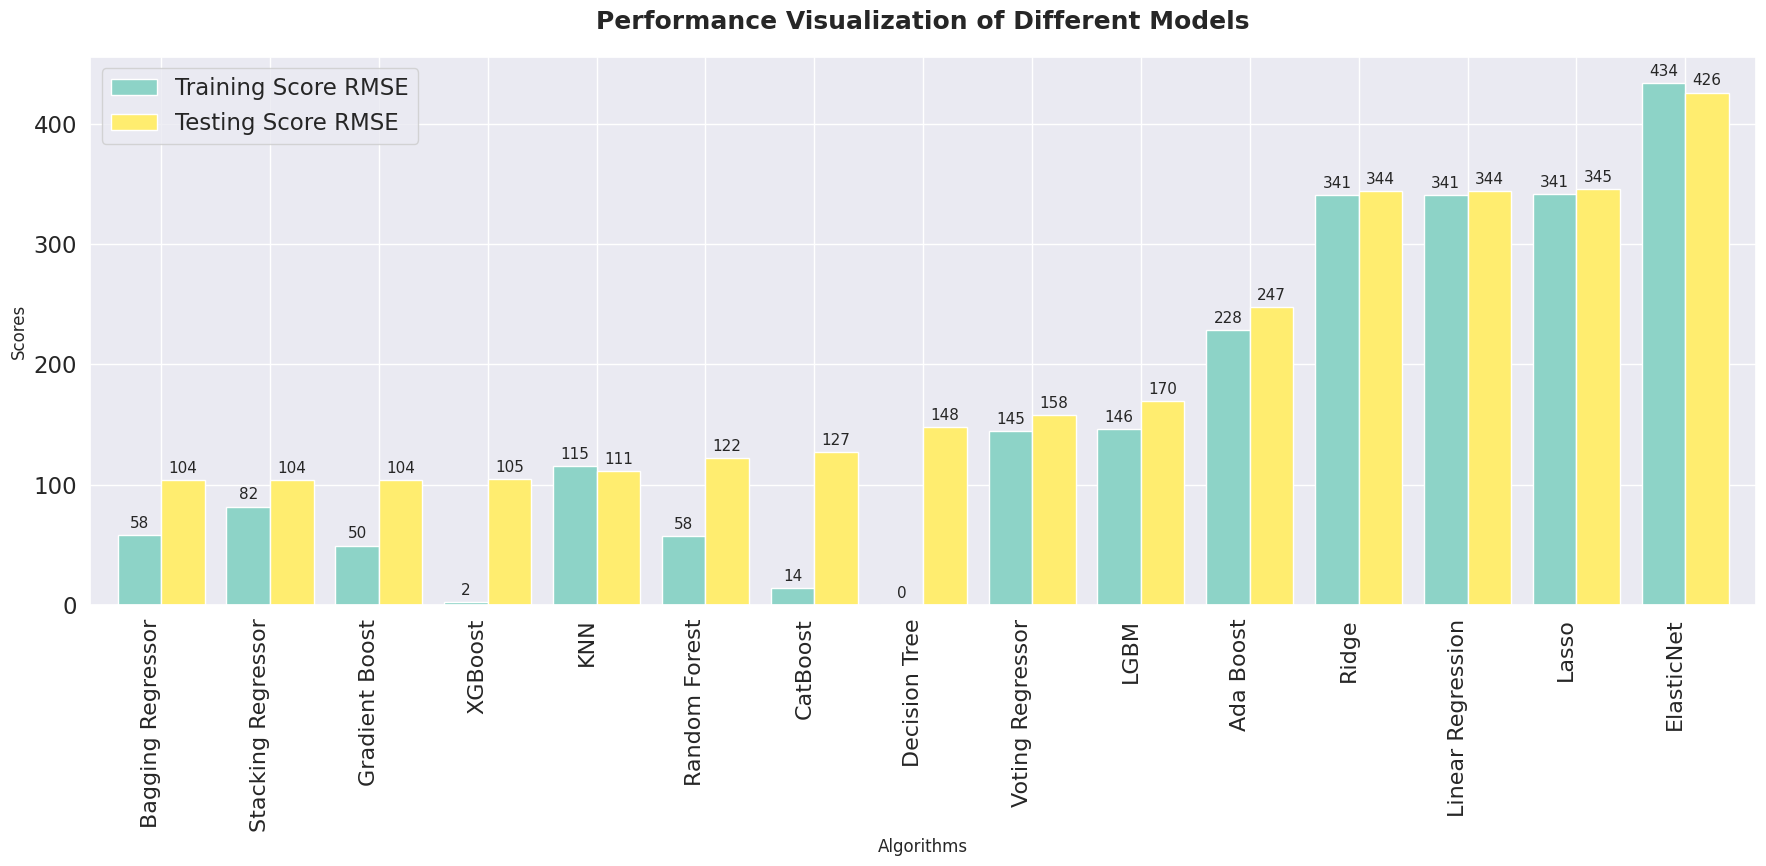

In [ ]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()